実行前に opencv-python をインストールする

In [ ]:
# Google colab の場合、下のコメント部分の#を削除し、実験に使う画像をダウンロードする
!wget https://github.com/opencv/opencv/raw/master/samples/data/detect_blob.png

--2025-02-01 07:41:53--  https://github.com/KHiraGit/sudspg_ds/raw/main/mikan.png
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/KHiraGit/sudspg_ds/main/mikan.png [following]
--2025-02-01 07:41:53--  https://raw.githubusercontent.com/KHiraGit/sudspg_ds/main/mikan.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162421 (159K) [image/png]
Saving to: ‘mikan.png’

mikan.png           100%[===================>] 158.61K  --.-KB/s    in 0.1s    

2025-02-01 07:41:54 (1.26 MB/s) - ‘mikan.png’ saved [162421/162421]

--2025-02-01 07:41:55--  https://github.com/opencv/opencv/raw/master/samples/data/s

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving image2.jpg to image2.jpg


0 0.0
1 187.5
2 171.0
3 0.0
4 2.0
5 0.0
6 0.0
7 0.0
8 215.0
9 231.5
10 21.0
11 346.0
12 348.0
13 236.5
14 283.0
15 0.0
画像中の物体の数 8


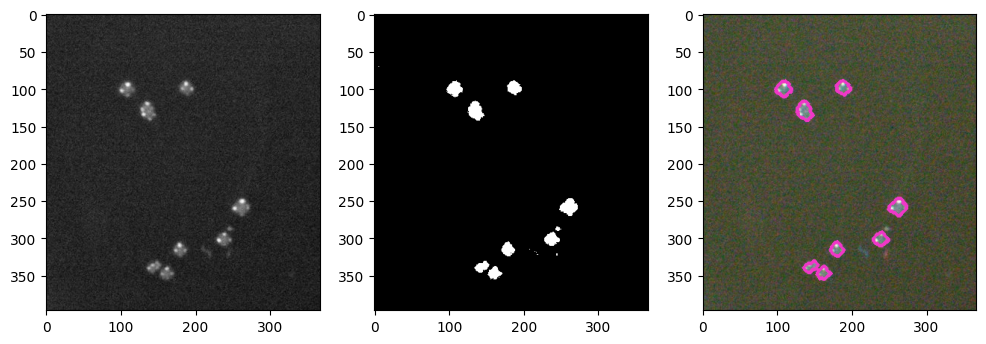

In [ ]:
# 画像中の物体をカウントする
import cv2
import numpy as np
import matplotlib.pyplot as plt

# for _th in [50, 100, 160, 180, 200]:
for _th in [100]:
    fig, ax = plt.subplots(1, 3, figsize=(12,5))
    # 対象の画像を読み込み、グレースケールに変換して表示
    # img_color = cv2.imread('detect_blob.png')
    # img_color = cv2.imread('image0.jpeg')
    img_color = cv2.imread('image2.jpg')
    # CROP_RADIUS = 256
    # COLOR_WHITE = (255, 255, 255, 255)
    # COLOR_BLACK = (0,0,0,0)
    # src_height, src_width = img_color.shape[:2]
    # center_point = (600, 500)
    # img = np.zeros((src_height, src_width, 4), dtype=np.uint8)
    # img = cv2.circle(img, center_point, CROP_RADIUS, COLOR_WHITE, cv2.FILLED)
    # img[:,:,:3] = img_color[:,:,:3]
    # img_color = img
    # ax[0].imshow(img_color)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    # ax[1].imshow(img_gray)
    ax[0].imshow(img_gray)

    # 画像を二値化 (二値化する際の輝度閾値は 50 に設定) し、画像中の輪郭を抽出
    thresh_value=_th
    thresh, img_thresh = cv2.threshold(img_gray, thresh_value, 255, cv2.THRESH_BINARY)
    ax[1].imshow(img_thresh)
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 抽出した輪郭の数を表示し、抽出した輪郭を描画
    _n = 0
    for _i, contour in enumerate(contours):
      area = cv2.contourArea(contour)
      print(_i, area)
      if area < 50:
        continue
      img = cv2.drawContours(img_color, [contour], -1, (240,55,200), 3)
      _n += 1
    # img = cv2.drawContours(img_color, contours, -1, (240,55,200), 3)
    print('画像中の物体の数', _n)
    ax[2].imshow(img)
    cv2.imwrite(f'img_{_th}.jpg', img)
    plt.show()